
# **CAP 5516 - Medical Image Computing (Spring 2025)**
Programming Assignment #3 (40 points) \
**Due: 4/11/2025, 11:59 PM (EST)** \


## **Parameter Efficient Fine-tuning Foundation Model for Nuclei Instance Segmentation**

### 1. **Dataset** 

NuInsSeg: A Fully Annotated Dataset for Nuclei Instance Segmentation in H&E-Stained Histological Images [1].
The dataset and detailed step-by-step instructions to generate related segmentation masks are publicly available at
https://www.kaggle.com/datasets/ipateam/nuinsseg and https://github.com/masih4/NuInsSeg, respectively.\
The dataset can also be downloaded from here: https://zenodo.org/records/10518968

### 2. **Task**

Review the dataset paper [1] and its corresponding GitHub repository [2] to familiarize yourself with the
experimental setup. You will follow the experiment setting as described in the paper.
For segmentation, we will utilize the Segment Anything Model (SAM) [3]. To enhance resource efficiency, select
one of the optimized versions of the original SAM model: MobileSAM [4], EfficientSAM [5], or TinySAM [6]. You
may choose any of these variants along with their pre-trained models. I highly suggest you use these efficient SAM
models. However, if you have the resource to run the original SAM model, that is also fine.
Assuming the use of the MobileSAM model, we will apply LoRA [7] for parameter-efficient fine-tuning to perform
nuclei instance segmentation on the NuInsSeg dataset [1].

### 3. **What to report**

1) The details of your implementation of applying LoRA for efficient fine-tuning.

2) Follow Table 3 in the dataset paper [1] and report the average results based on five-fold cross-validation in terms of those metrics (e.g., Dice, AJI, PQ). I hope your results can be much better than those baseline methods in the paper.

3) Since we will use LoRA for fine tuning, report the # of tunable parameters.

4) Provide a few examples of visual comparison of the predicted segmentation masks and the ground truth
masks.

### 4. **What to submit** ###

(1) A report for this assignment. Specifically, a detailed network architecture framework (figure) is required. For
example, how the LoRA layers are applied in your efficient fine-tuning framework. The implementation details are
important.\

(2) Clean code and clear instructions (e.g., a readme file) to reproduce your results. If you choose to host the code on
GitHub, please provide the GitHub link.


**Useful resources (e.g. examples of applying LoRA for SAM fine tuning)**
1. Finetune SAM on your customized medical imaging dataset https://github.com/mazurowski-lab/finetune-
SAM
2. Medical SAM Adapter https://github.com/SuperMedIntel/Medical-SAM-Adapter
3. https://github.com/tianrun-chen/SAM-Adapter-PyTorch
4. MeLo: Low-rank Adaptation is Better than Finetuning for Medical Image
https://github.com/JamesQFreeman/LoRA-ViT
5. SAMed: https://github.com/hitachinsk/SAMed
6. How to build the best medical image segmentation algorithm using foundation models: a comprehensive
empirical study with Segment Anything Model https://arxiv.org/pdf/2404.09957
7. SAM Guided Task-Specific Nuclei Segmentation in Digital Pathology: https://github.com/CVPR-KIT/SAM-Guided-Enhanced-Nuclei-Segmentation
8. LoRA for SAM:https://github.com/JamesQFreeman/Sam_LoRA
9. LoRA SAM Rings: https://github.com/MathieuNlp/Sam_LoRA 


### **References**
[1] Mahbod, Amirreza, Christine Polak, Katharina Feldmann, Rumsha Khan, Katharina Gelles, Georg Dorffner,
Ramona Woitek, Sepideh Hatamikia, and Isabella Ellinger. "NuInsSeg: A fully annotated dataset for nuclei instance
segmentation in H&E-stained histological images." Scientific Data 11, no. 1 (2024): 295.
https://arxiv.org/pdf/2308.01760\
[2] https://github.com/masih4/NuInsSeg?tab=readme-ov-file#codes-to-generate-segmentation-masks\
[3] Kirillov, Alexander, Eric Mintun, Nikhila Ravi, Hanzi Mao, Chloe Rolland, Laura Gustafson, Tete Xiao et al.
"Segment anything." In Proceedings of the IEEE/CVF International Conference on Computer Vision, pp. 4015-
4026. 2023.\
[4] Zhang, Chaoning, Dongshen Han, Yu Qiao, Jung Uk Kim, Sung-Ho Bae, Seungkyu Lee, and Choong Seon
Hong. "Faster segment anything: Towards lightweight sam for mobile applications." arXiv preprint
arXiv:2306.14289 (2023). [Code] https://github.com/ChaoningZhang/MobileSAM\
[5] Xiong, Yunyang, Bala Varadarajan, Lemeng Wu, Xiaoyu Xiang, Fanyi Xiao, Chenchen Zhu, Xiaoliang Dai et
al. "Efficientsam: Leveraged masked image pretraining for efficient segment anything." In Proceedings of the
IEEE/CVF Conference on Computer Vision and Pattern Recognition, pp. 16111-16121. 2024. [Code]
https://github.com/yformer/EfficientSAM (You can choose the smallest model EfficientSAM-Tiny)\
[6] Shu, Han, Wenshuo Li, Yehui Tang, Yiman Zhang, Yihao Chen, Houqiang Li, Yunhe Wang, and Xinghao Chen.
"Tinysam: Pushing the envelope for efficient segment anything model." arXiv preprint arXiv:2312.13789 (2023).
[Code] https://github.com/xinghaochen/TinySAM\
[7] Hu, Edward J., Yelong Shen, Phillip Wallis, Zeyuan Allen-Zhu, Yuanzhi Li, Shean Wang, Lu Wang, and
Weizhu Chen. "Lora: Low-rank adaptation of large language models." arXiv preprint arXiv:2106.09685 (2021).\


## Import Required Packages

In [1]:
# create anaconda environment
    # !conda create -n CAP5516_Assignment_03 python=3.10

%pip install git+https://github.com/facebookresearch/segment-anything.git
%pip install opencv-python
%pip install requests
%pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
%pip install numpy
%pip install pillow
%pip install matplotlib
%pip install tqdm
%pip install safetensors



  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-qv9n53mb
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-qv9n53mb
  Resolved https://github.com/facebookresearch/segment-anything.git to commit dca509fe793f601edb92606367a655c15ac00fdf
  Preparing metadata (setup.py) ... done
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Looking in indexes: https://download.pytorch.org/whl/cu118
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may n

In [16]:
# Import Packages

import os
import cv2
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torchvision
from torchvision import transforms as pth_transforms
import numpy as np

from PIL import Image
from segment_anything import sam_model_registry 
from segment_anything import SamAutomaticMaskGenerator
from segment_anything import SamPredictor
from sam_lora import LoRA_Sam
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
import glob

## Load and Prepare Dataset

In [2]:
from tqdm import tqdm
import os
import shutil
import json



# Define the path to the data
currentDirectory = os.getcwd()

data_path = f'{currentDirectory}/dataset/original/'

# Define the path to the organized data
organized_data_path = f'{currentDirectory}/dataset/experiment/'
organized_data_path_train = organized_data_path + 'orig_train/'
organized_data_path_val = organized_data_path + 'orig_validation/'
organized_data_path_test = organized_data_path + 'orig_test/'


In [3]:

# Create the organized data directory
os.makedirs(organized_data_path, exist_ok=True)
os.makedirs(organized_data_path_train, exist_ok=True)
os.makedirs(organized_data_path_train + 'images/', exist_ok=True)
os.makedirs(organized_data_path_train + 'labels/', exist_ok=True)
os.makedirs(organized_data_path_val, exist_ok=True)
os.makedirs(organized_data_path_val + 'images/', exist_ok=True)
os.makedirs(organized_data_path_val + 'labels/', exist_ok=True)
os.makedirs(organized_data_path_test, exist_ok=True)
os.makedirs(organized_data_path_test + 'images/', exist_ok=True)
os.makedirs(organized_data_path_test + 'labels/', exist_ok=True)

# create meta
meta = {}
count_tr = 0
count_v = 0
count_t = 0

# Define the path to the original data
for dirs_ in tqdm(os.listdir(data_path)):
    tissue_path = data_path + dirs_ + '/tissue images/'
    mask_path = data_path + dirs_ + '/mask binary/'
    # copy 70% to train, 20 % to val and 10% to test and create meta for each dirs_ 
    for i, (tissue_img, mask_img) in enumerate(zip(os.listdir(tissue_path), os.listdir(mask_path))):
        # skip if the file is not an image
        if not tissue_img.endswith('.png') or not mask_img.endswith('.png'):
            continue
        if not dirs_ in meta.keys():
            meta[dirs_] = {}
            meta[dirs_]['train'] = 0
            meta[dirs_]['val'] = 0
            meta[dirs_]['test'] = 0


        if i < len(os.listdir(tissue_path)) * 0.7 :
            shutil.copy(tissue_path + tissue_img, organized_data_path_train+ 'images/' + str(count_tr) + '.png')
            shutil.copy(mask_path + mask_img, organized_data_path_train + 'labels/' + str(count_tr) + '.png')
            meta[dirs_]['train'] += 1
            count_tr += 1
        elif i < len(os.listdir(tissue_path)) * 0.85:
            shutil.copy(tissue_path + tissue_img, organized_data_path_val + 'images/' + str(count_v) + '.png')
            shutil.copy(mask_path + mask_img, organized_data_path_val + 'labels/' + str(count_v) + '.png')
            meta[dirs_]['val'] += 1
            count_v += 1
        else:
            shutil.copy(tissue_path + tissue_img, organized_data_path_test + 'images/' + str(count_t) + '.png')
            shutil.copy(mask_path + mask_img, organized_data_path_test + 'labels/' + str(count_t) + '.png')
            meta[dirs_]['test'] += 1
            count_t += 1
        
        
        
        

# save meta
f = open(organized_data_path + 'meta.json', 'w')
f.write(json.dumps(meta, indent=4))
f.close()
print('Data organized successfully!')

100%|██████████| 31/31 [00:01<00:00, 28.76it/s]

Data organized successfully!


In [4]:
class MedicalClassificationDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform

        self.image_paths = sorted(glob.glob(os.path.join(root_dir, '*', '*.png')))

        # Print the number of loaded images
        print(f"Number of images: {len(self.image_paths)}")

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image = Image.open(self.image_paths[idx]).convert('RGB')

        if self.transform:
            image = self.transform(image)

        return image

In [5]:
# Next Instantiate the dataset and dataloader
print(organized_data_path_train)
print(organized_data_path_val)

train_root_dir = os.path.join(organized_data_path_train)
valid_root_dir = os.path.join(organized_data_path_val)

train_transform = pth_transforms.Compose([
    pth_transforms.ToTensor(),
])

valid_transform = pth_transforms.Compose([
    pth_transforms.Resize((256, 256)),
    pth_transforms.ToTensor(),
    pth_transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

train_dataset = MedicalClassificationDataset(root_dir=train_root_dir, transform=train_transform)
valid_dataset = MedicalClassificationDataset(root_dir=valid_root_dir, transform=valid_transform)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True, num_workers=2)
valid_loader = DataLoader(valid_dataset, batch_size= 8, shuffle=True, num_workers = 2)


/mnt/Storage02/SoftwareDev/CAP_5516_Medical_Imaging_Computing/Assignments/Assignment_03/dataset/experiment/orig_train/
/mnt/Storage02/SoftwareDev/CAP_5516_Medical_Imaging_Computing/Assignments/Assignment_03/dataset/experiment/orig_validation/
Number of images: 956
Number of images: 206


## Initialize SAM Model

In [6]:
# Print list of checkpoints in checkpoint folder:
!tree --du -h '{currentDirectory}/checkpoints'

[3.9G]  /mnt/Storage02/SoftwareDev/CAP_5516_Medical_Imaging_Computing/Assignments/Assignment_03/checkpoints
├── [358M]  sam_vit_b_01ec64.pth
├── [2.4G]  sam_vit_h_4b8939.pth
└── [1.2G]  sam_vit_l_0b3195.pth

 3.9G used in 0 directories, 3 files


In [9]:
sam_checkpoint = f'{currentDirectory}/checkpoints/sam_vit_l_0b3195.pth'
model_type = "vit_l" #
device = "cuda" #cpu,cuda

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)
mask_generator1 = SamAutomaticMaskGenerator(sam, points_per_batch=16)
predictor = SamPredictor(sam)

In [10]:
# Check VRAM Usage:
!nvidia-smi

Thu Apr  3 00:20:29 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.120                Driver Version: 550.120        CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4090 ...    Off |   00000000:01:00.0  On |                  N/A |
| N/A   47C    P0             38W /  125W |    1548MiB /  16376MiB |      7%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

## Test SAM Model

Image Path:  /mnt/Storage02/SoftwareDev/CAP_5516_Medical_Imaging_Computing/Assignments/Assignment_03/dataset/experiment/orig_train//images/0.png
(512, 512, 3)


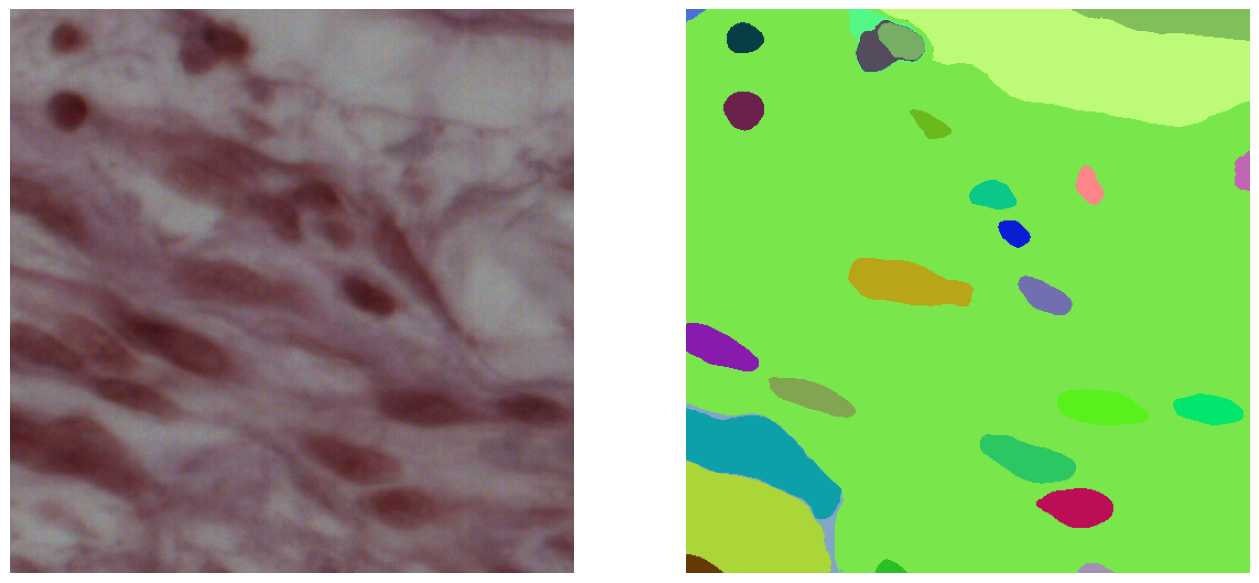

In [11]:
import random

import numpy as np

def show_anns(anns, axes=None):
    if len(anns) == 0:
        return
    if axes:
        ax = axes
    else:
        ax = plt.gca()
        ax.set_autoscale_on(False)
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    polygons = []
    color = []
    for ann in sorted_anns:
        m = ann['segmentation']
        img = np.ones((m.shape[0], m.shape[1], 3))
        color_mask = np.random.random((1, 3)).tolist()[0]
        for i in range(3):
            img[:,:,i] = color_mask[i]
        ax.imshow(np.dstack((img, m**0.5)))

num_images = 10
random_indices = random.sample(range(len(train_dataset)), num_images)
image_tensor= train_dataset[0]
image_path = f"{organized_data_path_train}/images/0.png"

print("Image Path: ",image_path)
image_information = cv2.imread(image_path)
image = cv2.resize(image_information, (512,512))
masks = mask_generator1.generate(image)

image_np = image_tensor.numpy()
# Reshape the image data to a valid shape
image_data = np.moveaxis(image_np, 0, -1)  # Move the channels axis to the last position
print(image_data.shape)  # Output: (256, 256, 3)
# Plot the original image and the mask


# Plot the original image and the mask
fig, axs = plt.subplots(1, 2, figsize=(16, 16))
axs[0].imshow(image)
axs[1].imshow(image)
show_anns(masks, axs[1])
axs[0].axis('off')
axs[1].axis('off')
plt.show()
# for idx in random_indices:
#     # Get the image tensor
#     image_tensor= train_dataset[idx]

#     # Apply the mask generator
#     masks = mask_generator1.generate(image_tensor)

#     # Convert the image tensor back to a PIL image
#     image = torchvision.transforms.ToPILImage()(image_tensor)
    
#     # Plot the original image and the mask
#     fig, axs = plt.subplots(1, 2, figsize=(12, 4))
#     axs[0].imshow(image)
#     axs[1].imshow(image)
#     show_anns(masks, axs[len(image)][len(image[0])])
#     axs[0].axis('off')
#     axs[1].axis('off')
#     plt.show()

## Apply LORA To SAM

In [11]:
import torch
import torch.nn as nn
from torch.nn import functional as F
from segment_anything.modeling import Sam
import math

class LoRA_qkv(nn.Module):
    """
    LoRA adaptation for SAM's qkv projections
    Only adapts queries and values (common practice)
    """
    def __init__(self, qkv_layer, rank=4):
        super().__init__()
        self.dim = qkv_layer.in_features
        self.qkv = qkv_layer
        self.qkv.requires_grad_(False)  # freeze original weights
        
        # LoRA for query
        self.lora_a_q = nn.Linear(self.dim, rank, bias=False)
        self.lora_b_q = nn.Linear(rank, self.dim, bias=False)
        
        # LoRA for value
        self.lora_a_v = nn.Linear(self.dim, rank, bias=False)
        self.lora_b_v = nn.Linear(rank, self.dim, bias=False)
        
        # Initialize LoRA weights
        nn.init.kaiming_uniform_(self.lora_a_q.weight, a=math.sqrt(5))
        nn.init.zeros_(self.lora_b_q.weight)
        nn.init.kaiming_uniform_(self.lora_a_v.weight, a=math.sqrt(5))
        nn.init.zeros_(self.lora_b_v.weight)

    def forward(self, x):
        qkv = self.qkv(x)  # original projection
        
        # Get LoRA adaptations
        lora_q = self.lora_b_q(self.lora_a_q(x))
        lora_v = self.lora_b_v(self.lora_a_v(x))
        
        # Apply to query and value portions of qkv
        # SAM's qkv is ordered as [q, k, v] concatenated
        qkv[..., :self.dim] += lora_q  # modify query
        qkv[..., -self.dim:] += lora_v  # modify value
        
        return qkv
    
def add_lora_to_sam(sam_model, rank=4):
        """
        Add LoRA to all attention layers in SAM
        """
        # Get the vision transformer (ViT) from SAM
        vit = sam_model.image_encoder
        
        # Process each attention block
        for block in vit.blocks:
            # Replace qkv projection with our LoRA version
            original_qkv = block.attn.qkv
            block.attn.qkv = LoRA_qkv(original_qkv, rank=rank)
        
        return sam_model

In [12]:
sam_checkpoint = f'{currentDirectory}/checkpoints/sam_vit_l_0b3195.pth'
model_type = "vit_l" #
device = "cuda" #cpu,cuda

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)

lora_sam = add_lora_to_sam(sam, rank=4).to(device="cuda")

In [13]:
!nvidia-smi

Thu Apr  3 00:29:27 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.120                Driver Version: 550.120        CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4090 ...    Off |   00000000:01:00.0  On |                  N/A |
| N/A   47C    P0             36W /  125W |    1548MiB /  16376MiB |      8%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [14]:
mask_generator1 = SamAutomaticMaskGenerator(lora_sam, points_per_batch=16)
predictor = SamPredictor(lora_sam)

## Test with LORA using Pretrained Model

Image Path:  /mnt/Storage02/SoftwareDev/CAP_5516_Medical_Imaging_Computing/Assignments/Assignment_03/dataset/experiment/orig_train//images/0.png
(512, 512, 3)


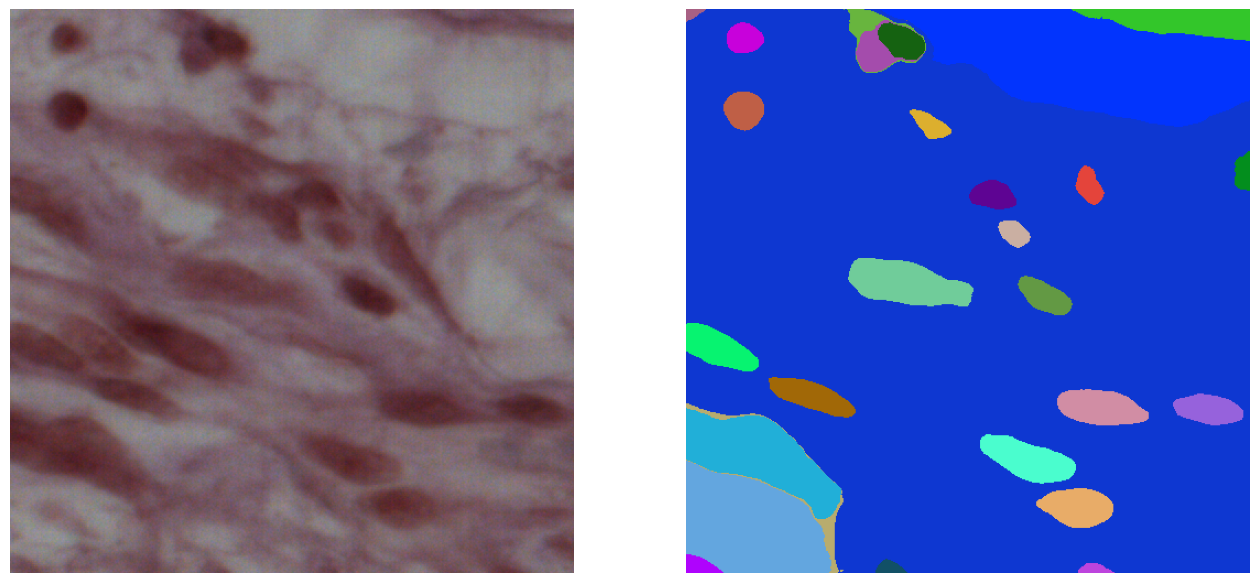

In [15]:
import random

import numpy as np

def show_anns(anns, axes=None):
    if len(anns) == 0:
        return
    if axes:
        ax = axes
    else:
        ax = plt.gca()
        ax.set_autoscale_on(False)
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    polygons = []
    color = []
    for ann in sorted_anns:
        m = ann['segmentation']
        img = np.ones((m.shape[0], m.shape[1], 3))
        color_mask = np.random.random((1, 3)).tolist()[0]
        for i in range(3):
            img[:,:,i] = color_mask[i]
        ax.imshow(np.dstack((img, m**0.5)))

num_images = 10
random_indices = random.sample(range(len(train_dataset)), num_images)
image_tensor= train_dataset[0]
image_path = f"{organized_data_path_train}/images/0.png"

print("Image Path: ",image_path)
image_information = cv2.imread(image_path)
image = cv2.resize(image_information, (512,512))
masks = mask_generator1.generate(image)

image_np = image_tensor.numpy()
# Reshape the image data to a valid shape
image_data = np.moveaxis(image_np, 0, -1)  # Move the channels axis to the last position
print(image_data.shape)  # Output: (256, 256, 3)
# Plot the original image and the mask


# Plot the original image and the mask
fig, axs = plt.subplots(1, 2, figsize=(16, 16))
axs[0].imshow(image)
axs[1].imshow(image)
show_anns(masks, axs[1])
axs[0].axis('off')
axs[1].axis('off')
plt.show()
# for idx in random_indices:
#     # Get the image tensor
#     image_tensor= train_dataset[idx]

#     # Apply the mask generator
#     masks = mask_generator1.generate(image_tensor)

#     # Convert the image tensor back to a PIL image
#     image = torchvision.transforms.ToPILImage()(image_tensor)
    
#     # Plot the original image and the mask
#     fig, axs = plt.subplots(1, 2, figsize=(12, 4))
#     axs[0].imshow(image)
#     axs[1].imshow(image)
#     show_anns(masks, axs[len(image)][len(image[0])])
#     axs[0].axis('off')
#     axs[1].axis('off')
#     plt.show()

## Fine Tune LORA Model

In [18]:
optimizer = optim.Adam(
        [p for p in lora_sam.parameters() if p.requires_grad],
        lr=0.001,
        #weight_decay= 0.00
)


## Perform Nuclei Instance Segmentation on NulnSeg Dataset

## Results Using 5-Fold Cross Validation